In [6]:
from paraphrase_metrics import ROUGEMetric
import pandas as pd
import numpy as np
import matplotlib.pyplot as vlt

In [3]:
datadir = "../../../data/backtranslate/"
readpath = datadir + "backtranslate.csv"

df = pd.read_csv(readpath, header=None, sep='\t', names=['s', 'p'])

sentences = df['s'].tolist()
paraps = df['p'].tolist()

In [5]:
metric = ROUGEMetric()
scores = metric.eval(sentences, paraps)

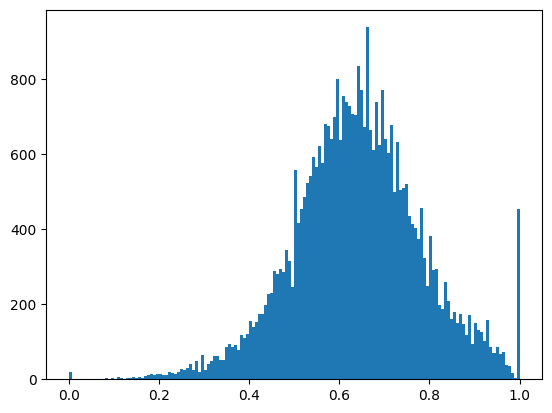

In [8]:
vlt.hist(scores, bins=150)
vlt.show()

In [23]:
sentences_np = np.array(sentences)
paraps_np = np.array(paraps)

zero_ix = np.nonzero(scores == 0)
one_ix = np.nonzero(scores == 1)
zero_pairs = np.array([[sentences_np[zero_ix], paraps_np[zero_ix]]]).T
one_pairs = np.array([[sentences_np[one_ix], paraps_np[one_ix]]]).T

In [24]:
for orig, bt in zero_pairs[:5]:
    print("Orig: ", orig)
    print("BT: ", bt)
    print()

Orig:  ['LJOTIČEVCI . . . . . . . . . . . . .']
BT:  ['Ljudje.........']

Orig:  ['te dvojnosti? . . . . . . . . . . . . . .']
BT:  ['V tej dualnosti...']

Orig:  ['raze sožalja, cvetje, sveče in svete maše, g. patru Luki za opravljen obr']
BT:  ['Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â']

Orig:  ['Se pravi, da država ne bi mogla vzdrževati profesionalne vojske?']
BT:  ['Ali je mogoče imeti profesionalno vojsko?']

Orig:  ['# which fax number to transmit to the receiving station']
BT:  ['# številka faksa, ki jo želite poslati sprejemni postaji']



In [25]:
for orig, bt in one_pairs[:5]:
    print("Orig: ", orig)
    print("BT: ", bt)
    print()

Orig:  ['PAOK: 4 Coldebella (30 let, 200), 5 Nikolaidis (24, 85), 6 Berry (34, 204), 8 Maslarinos (24, 192), 9 Balogiannis (28 (197), 10 Peral (24, 210), 11 King (26, 187), 12 Morales (29, 212), 13 Despos (23, 209), 15 Giannoulis (23, 208).']
BT:  ['PAOK: 4 Coldebella (30 let, 200), 5 Nikolaidis (24, 85), 6 Berry (34, 204), 8 Maslarinos (24, 192, 9 Balogiannis (28 (197), 10 Peral (24, 210), 11 King (26, 187), 12 Morales (29, 212), 13 Despos (23, 209, 15) Giannoulis (23, 208).']

Orig:  ['Pari: Savinjski Hopsi - Helios (19.30), Loka kava - Triglav (18), Kraški zidar - Pivovarna Laško (19), Krka Telekom - Zagorje (20), ZM Maribor - Slovan (20), Union Olimpija - Rogla Atras (četrtek, 19). E. B.']
BT:  [': Pari Savinjski Hopsi - Helios (19.30), Loka kava - Triglav (18), Kraški zidar - Pivovarna Laško (19), Krka Telekom - Zagorje (20), ZM Maribor - Slovan (20), Union Olimpija - Rogla Atras (četrtek, 19). E. B.']

Orig:  ['Zagovornik Borisa Popoviča, meni, da odgovorni delajo prepočasi in "p

In [27]:
for step in np.arange(0.1, 1, 0.1):
    score_ix = np.nonzero(np.abs(scores - step) < 0.05)

    score_pairs = np.array([[sentences_np[score_ix], paraps_np[score_ix]]]).T

    print("----------------------------------------")
    print("Score: ", step)
    for orig, bt in score_pairs[:5]:
        print("Orig: ", orig)
        print("BT: ", bt)
        print()

----------------------------------------
Score:  0.1
Orig:  ['VSAK OD OBEH SPOLOV IMA PRI VSEM TEM OBRAVNAVANEM ŽENSKEM OGLAŠANJU OZIROMA OGLAŠEVANJU TOREJ KOPICO POTENCIALNIH MOŽNOSTI; PRAV TOLIKO PA JE TEH TUDI ZA EVOLUCIONISTIČNO METABIOLOŠKO POIGRAVANJE Z RAZNIMI BOLJ OZIROMA MANJ TEHTNIMI HIPOTEZAMI ALI PA TUDI SAMO ZABAVNIMI DOMISLICAMI, KI SE IZVAJAJO PO TUKAJŠNJEM, RES ŽE KAR PRECEJ EKSCENTRIČNEM PODIJU – PRAVKAR IZPELJANA NEKAJSTRANSKA CELOSTNA OBRAVNAVA ŽENSKEGA IZRAŽANJA TEH SVOJIH SUBLIMNIH EMOCIJ MOREBITI NAMREČ NIMA PRAV NE VEM KAKO IZJEMNO TRDNE IN VSESTRANSKE ZVEZE S SICERŠNJO VSEBINO POGLAVJA, ZATO PA JE NAMESTO TE DELOMA MORDA MANJKAJOČE RELEVANTNOSTI TU DRUG, ZAME DOVOLJ TEHTEN ESTETSKI RAZLOG ZA NJENO NAVZOČNOST V PRIČUJOČIH OKVIRIH: METAFORA IZ NOSILNEGA NASLOVA TEGA POGLAVJA SE JI PRAV NEKAKO SVOJSKO PODA.']
BT:  ['V vseh teh zadevah, vsaka ženska oglaševanje ima določeno število potencialnih; najmanj, Vendar pa, je način, na katerega so te zadeve, ki jih obravnav